# Pymaceuticals Inc.
---

### Analysis

- In this study, 249 mice who were identified with SCC tumors received treatment with a range of drug regimens. And there are several duplicate mice IDs in this study. But only one 'g989' mouse ID is the duplicate mouse ID number that shows up for Mouse ID and Timepoint together;
- The Mean of Tumor Volume is almost equal to the Median of Tumor Volume;
- For the Drug Regimen, the Capomulin and the Ramicane have very close results which relate to the total number of rows (Mouse ID/Timepoints). 
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combine_data = pd.merge(study_results,mouse_metadata,on="Mouse ID",how="left")

# Display the data table for preview
combine_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [3]:
# Checking the number of mice.
number_mice = combine_data["Mouse ID"].nunique()
number_mice

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
uniquely_mice_ID = combine_data[combine_data.duplicated(subset=["Mouse ID","Timepoint"])]
duplicate_mice_ID = uniquely_mice_ID["Mouse ID"].unique()
duplicate_mice_ID

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
df1 = combine_data[combine_data["Mouse ID"]=="g989"]
df1

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df2 = combine_data[combine_data["Mouse ID"]!="g989"]
df2

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Checking the number of mice in the clean DataFrame.   
df2["Mouse ID"].nunique()


248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Mean_Tumor_Volume = combine_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
Median_Tumor_Volume = combine_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
Tumor_Volume_Variance = combine_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
Tumor_Volume_Std= combine_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
Tumor_Volume_SEM = combine_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_columns = pd.DataFrame({"Mean Tumor Volume":Mean_Tumor_Volume,"Median Tumor Volume":Median_Tumor_Volume,
                                "Tumor Volume Variance":Tumor_Volume_Variance,
                                "Tumor Volume Std Dev":Tumor_Volume_Std,
                                "Tumor Volume Std. Err.":Tumor_Volume_SEM})

summary_columns

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics = combine_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem']).reset_index()
summary_statistics

,Drug Regimen,mean,median,var,std,sem
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen'>

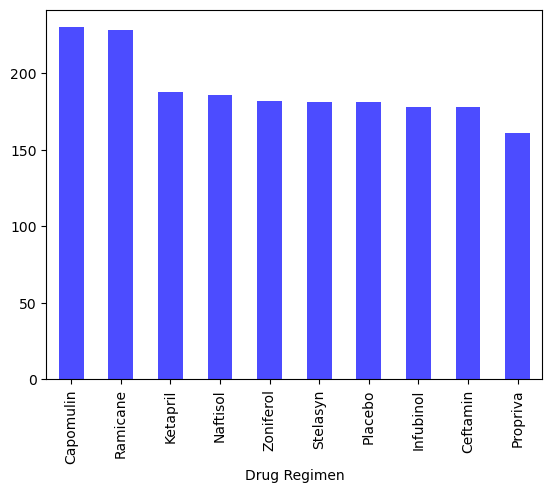

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = combine_data["Drug Regimen"].value_counts()
regimen_counts.plot.bar(color='blue', alpha=0.7)


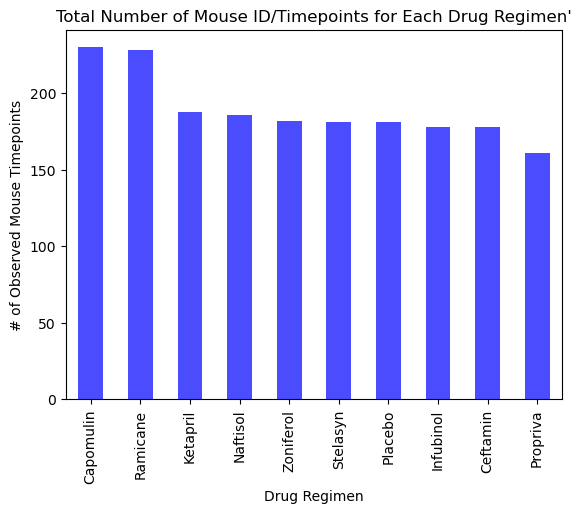

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

regimen_counts = combine_data["Drug Regimen"].value_counts()
regimen_counts.plot(kind='bar', color='blue', alpha=0.7)
plt.title("Total Number of Mouse ID/Timepoints for Each Drug Regimen'")
plt.xlabel('Drug Regimen')
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

<Axes: ylabel='count'>

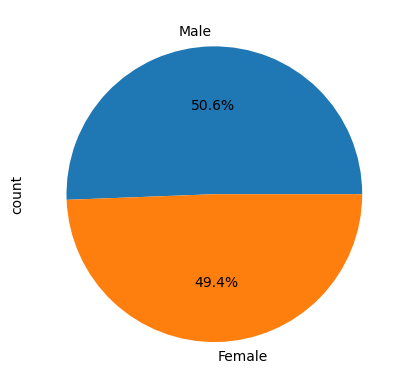

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
counts = combine_data.Sex.value_counts()
counts.plot.pie(autopct='%1.1F%%')


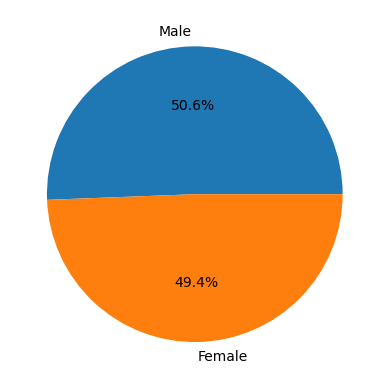

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(counts,labels=counts.index, autopct='%1.1f%%')

plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
max_tumor = df2.groupby(["Mouse ID"],as_index=False)["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge = pd.merge(df2,max_tumor,on=["Mouse ID","Timepoint"],how="right")
merge

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = merge.loc[merge["Drug Regimen"] == drug,"Tumor Volume (mm3)"]
   
    # add subset 
    tumor_vol.append(tumor_volumes)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volumes.quantile([.25,.5,.75])
    
    iqr = quartiles[0.75]-quartiles[0.25]
    lower_bound = quartiles[0.25]-(1.5*iqr)
    upper_bound = quartiles[0.75]+ (1.5*iqr)

    outliers = tumor_volumes.loc[(tumor_volumes < lower_bound)|(tumor_volumes > upper_bound)]

    print(f"{drug} outliers: {outliers}")
    

Capomulin outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


{'whiskers': [<matplotlib.lines.Line2D at 0x7fb41b832bc0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb41b833100>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb41b832920>,
 'medians': [<matplotlib.lines.Line2D at 0x7fb41b833640>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb41b833910>,
 'means': []}

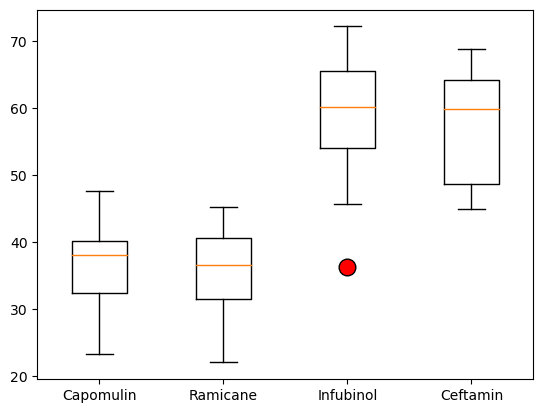

In [18]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.boxplot(tumor_vol,labels=treatment_list,flierprops={"markerfacecolor":"red","markersize":12})


## Line and Scatter Plots

<Axes: xlabel='Timepoint'>

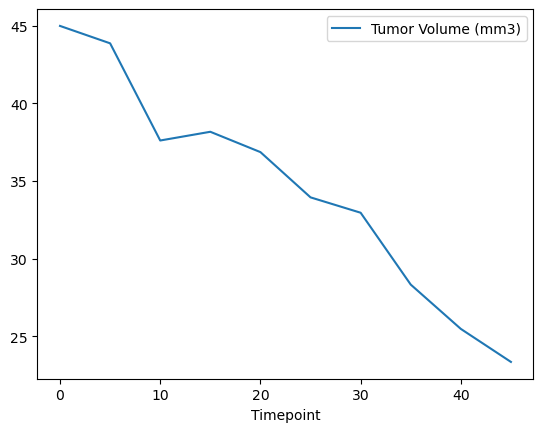

In [19]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin = combine_data[combine_data["Drug Regimen"]=="Capomulin"]
capomulin[capomulin["Mouse ID"]== "s185"].plot(x="Timepoint",y="Tumor Volume (mm3)")

In [23]:
capomulin

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1854,s710,45,40.728578,1,Capomulin,Female,1,23
1859,j119,45,38.125164,1,Capomulin,Female,7,23
1878,i557,45,47.685963,1,Capomulin,Female,1,24
1888,r944,45,41.581521,2,Capomulin,Male,12,25


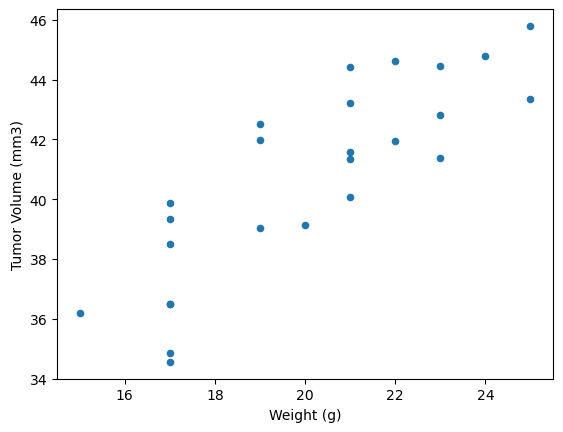

In [27]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

data = capomulin.groupby(["Mouse ID"]).agg({"Weight (g)":"mean","Tumor Volume (mm3)":"mean"})
data.plot.scatter(x = "Weight (g)",y = "Tumor Volume (mm3)");



## Correlation and Regression

In [30]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
st.pearsonr(data["Weight (g)"],data["Tumor Volume (mm3)"])

model = st.linregress(data["Weight (g)"],data["Tumor Volume (mm3)"])
m =  model.slope